In [1]:
import pandas as pd
import numpy as np

from data import Data

In [2]:
data = Data("project_train.csv")

data.df.loc[84, "energy"] = 0.734
data.df.loc[94, "loudness"] = -6.542

In [3]:
validation_df = data.df.loc[0:100]
validation_labels = data.labels.loc[0:100]

data.df = data.df.loc[100:].reset_index(drop=True)
data.labels = data.labels.loc[100:].reset_index(drop=True)

In [4]:
data.preprocess(shuffle=True, remove_duplicates=True,
                bound_bool=False, unbound_bool=True, 
                class_bool = True, binary_bool = False)

There were 6 duplicated elements in the dataset, and have been removed from the dataframe


In [5]:
test_data = Data("project_test.csv", test=True)

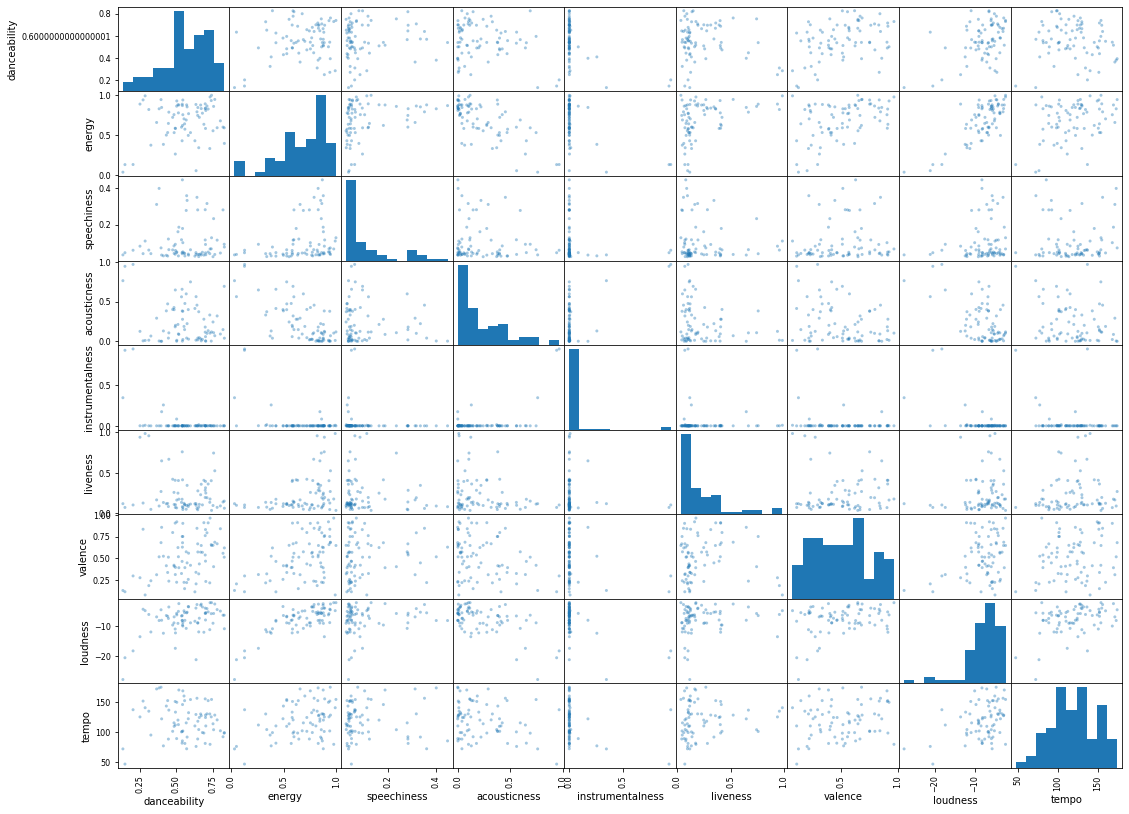

In [6]:
test_data.visualize()

In [7]:
test_data.df = data.preprocess_new_data(test_data)

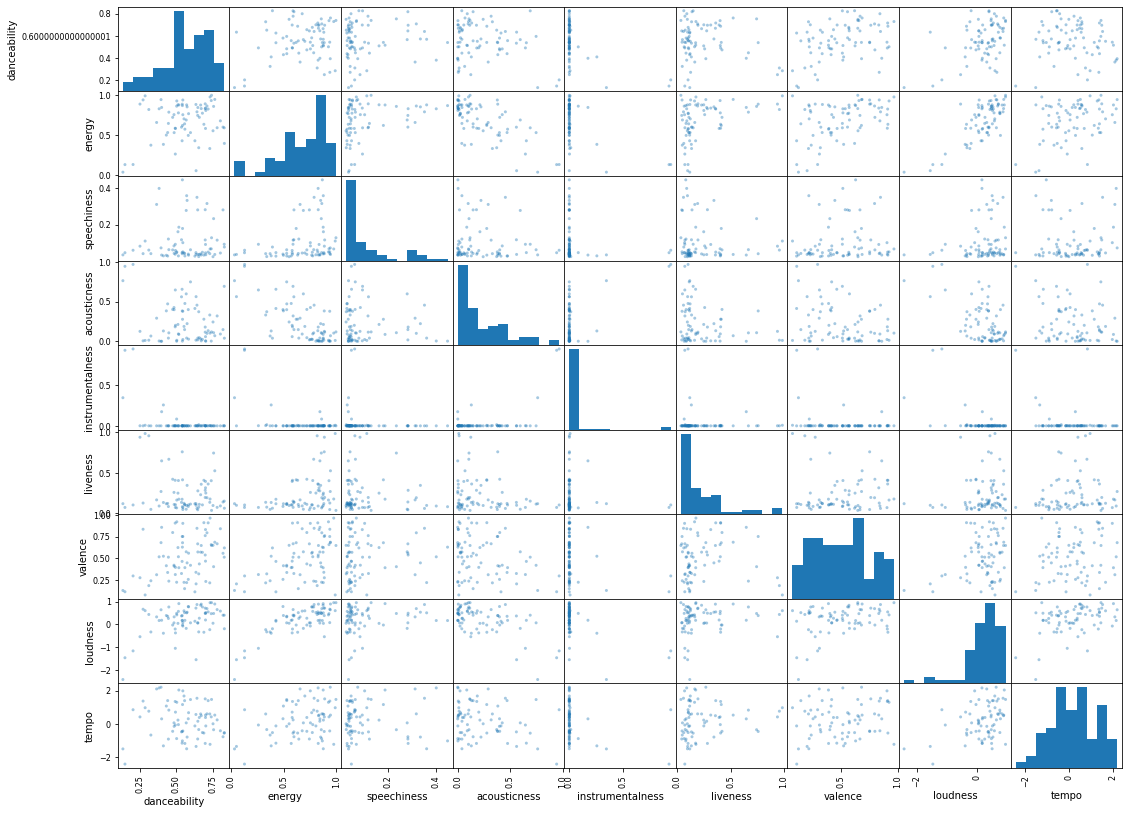

In [8]:
test_data.visualize()

accuracy : 0.8646616541353384
recall : 0.9306930693069307
precision : 0.8245614035087719
F1 : 0.8744186046511628


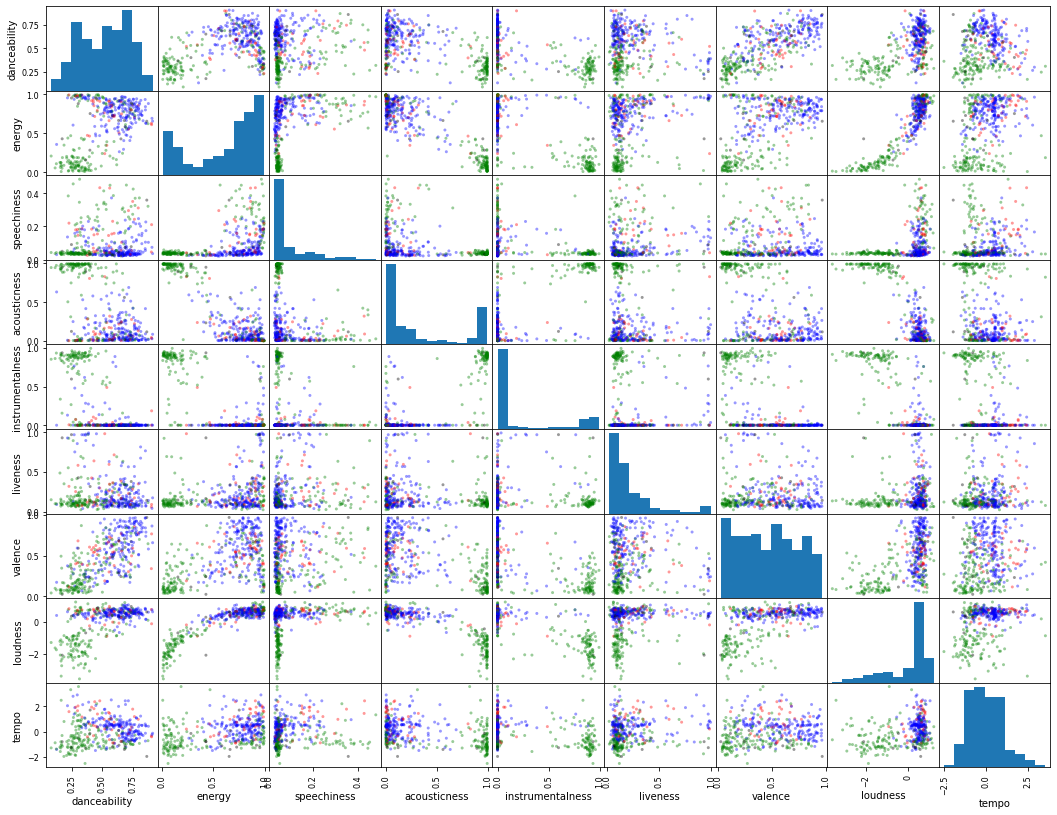

In [9]:
from learning_machine import SVM

n_estimators = 150
svm = SVM(data)
svm._change_parameters("rbf")

svm.fit_with_all_data()

In [10]:
predictions = svm._predict(test_data.df)
print(np.shape(predictions))

(75,)


In [11]:
from learning_machine import SVM

PREDICTIONS = np.zeros((75,))

for i in range(50):
    n_estimators = 150
    svm = SVM(data)
    svm._change_parameters("rbf")

    svm.fit_with_all_data(visualize=False, print_metrics=False)
    predictions = svm._predict(test_data.df)
    
    PREDICTIONS += predictions

In [12]:
print(PREDICTIONS/50)

[0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0.]


In [13]:
PREDICTIONS = PREDICTIONS / 100

PREDICTIONS = 1*(PREDICTIONS >= 0.5) + 0*(PREDICTIONS < 0.5)
print(PREDICTIONS)

[0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0]


In [14]:
test_data.df["Labels"] = PREDICTIONS

In [15]:
test_data.df.to_csv("test_data_with_predictions.csv")

In [16]:
new_test_data = Data("project_test.csv", test=True)
new_test_data.df = validation_df

In [17]:
new_test_data.df = data.preprocess_new_data(new_test_data)

accuracy : 0.8646616541353384
recall : 0.9306930693069307
precision : 0.8245614035087719
F1 : 0.8744186046511628


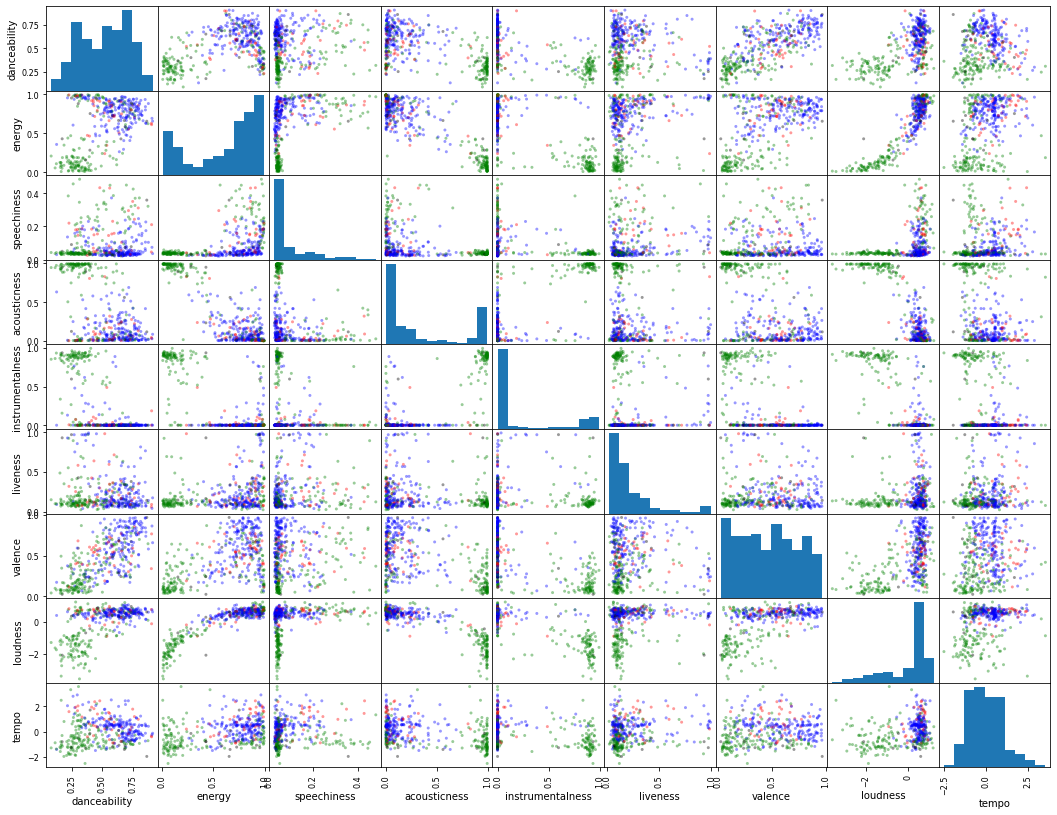

In [18]:
from learning_machine import SVM
svm = SVM(data)
svm._change_parameters("rbf")

svm.fit_with_all_data()

In [19]:
predictions = svm._predict(new_test_data.df)
print(np.shape(predictions))

(101,)


In [20]:
print(predictions)

[1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0]


In [21]:
print(np.sum(np.abs(predictions - validation_labels)))

50
